In [66]:
!pip install PyMySql sqlalchemy mlxtend folium
!pip install pyarrow==13.0.0

  Obtaining dependency information for pyarrow==13.0.0 from https://files.pythonhosted.org/packages/9a/bf/e88a36fa1669a5ed3a222bb6f8dee25627c13ee2c9297fd9d9e9dc0910e9/pyarrow-13.0.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 1.1 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 15.0.0
    Uninstalling pyarrow-15.0.0:
      Successfully uninstalled pyarrow-15.0.0


In [1]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import folium
from folium.plugins import HeatMap
import sqlalchemy
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import time

In [2]:
engine = sqlalchemy.create_engine("sqlite:////mnt/c/Muneeb/Freelancing/accident_data_assignment/accident_data_v1.0.0_2023.db")

In [3]:
engine.connect()

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
df_accident = pd.read_sql_table("accident", engine)
df_casualty = pd.read_sql_table("casualty", engine)
df_lsoa = pd.read_sql_table("lsoa", engine)
df_vehicle = pd.read_sql_table("vehicle", engine)

In [73]:
df_accident

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,7,03:12,32,E09000010,E09000010,3,105,6,30,0,-1,-1,-1,0,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,01/01/2017,1,01:30,1,E09000033,E09000033,3,5,6,30,3,4,6,0,0,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,01/01/2017,1,00:30,5,E09000030,E09000030,3,13,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,01/01/2017,1,01:11,32,E09000010,E09000010,3,1010,1,30,1,4,4,154,0,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,01/01/2017,1,01:42,4,E09000012,E09000012,3,107,3,20,6,2,3,10,0,5,4,1,2,0,0,1,1,2,E01001808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461347,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,-1
461348,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1
461349,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1
461350,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1


In [74]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461352 entries, 0 to 461351
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               461352 non-null  object 
 1   accident_year                                461352 non-null  int64  
 2   accident_reference                           461352 non-null  object 
 3   location_easting_osgr                        461236 non-null  float64
 4   location_northing_osgr                       461236 non-null  float64
 5   longitude                                    461226 non-null  float64
 6   latitude                                     461226 non-null  float64
 7   police_force                                 461352 non-null  int64  
 8   accident_severity                            461352 non-null  int64  
 9   number_of_vehicles                           461352 non-nul

In [75]:
df_accident.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,461352.000000,461236.000000,4.612360e+05,461226.000000,461226.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000,461352.000000
mean,2018.368378,452593.115756,2.801803e+05,-1.246998,52.408849,28.193388,2.784436,1.840441,1.301245,4.108171,324.427242,4.213852,773.579577,5.200413,36.898871,3.193629,1.748006,2.697335,220.470081,0.262112,1.099518,2.036235,1.649918,1.385239,0.217519,0.170518,1.325463,1.334877,1.680147
std,1.091566,94822.718705,1.515501e+05,1.389702,1.365101,24.801609,0.443648,0.709869,0.746398,1.927216,256.810667,1.465905,1575.278195,1.698629,14.013945,9.635082,2.535687,3.137408,927.475025,1.460680,2.333113,1.724691,1.819426,0.955180,1.240981,1.121964,0.469057,0.556352,0.851554
min,2017.000000,64084.000000,1.023500e+04,-7.525273,49.912362,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2017.000000,388539.000000,1.755300e+05,-2.172668,51.465689,5.000000,3.000000,1.000000,1.000000,2.000000,82.000000,3.000000,0.000000,6.000000,30.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2018.000000,459198.500000,2.208650e+05,-1.126264,51.870257,22.000000,3.000000,2.000000,1.000000,4.000000,303.000000,4.000000,27.000000,6.000000,30.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2019.000000,529290.000000,3.865510e+05,-0.136389,53.372899,45.000000,3.000000,2.000000,1.000000,6.000000,512.000000,6.000000,514.000000,6.000000,40.000000,3.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,2020.000000,655391.000000,1.209512e+06,1.759641,60.763722,99.000000,3.000000,24.000000,59.000000,7.000000,941.000000,6.000000,9176.000000,9.000000,70.000000,99.000000,9.000000,9.000000,9177.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000


# Question 1

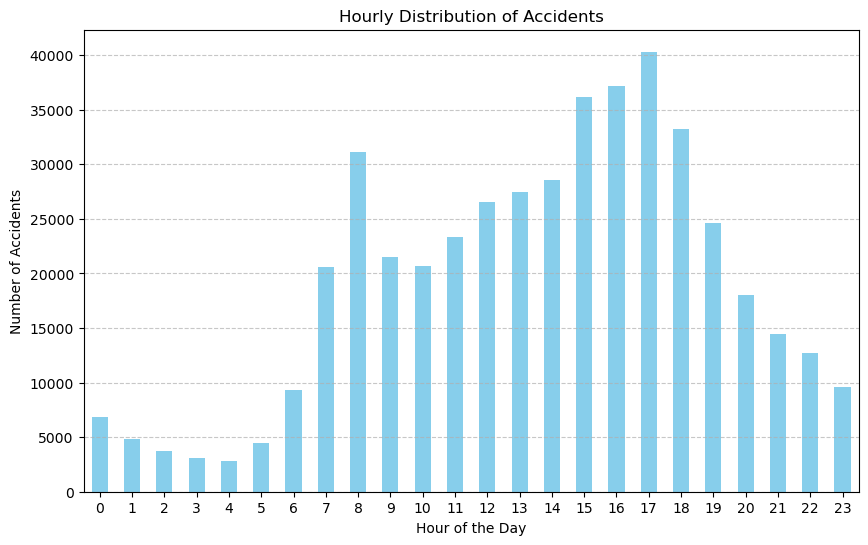

In [76]:
# Explicitly specify the datetime format to ensure consistent parsing
df_accident['hour'] = pd.to_datetime(df_accident['time'], format='%H:%M').dt.hour

# Group accidents by hour of the day
hourly_accidents = df_accident.groupby('hour').size()

# Plotting hourly accident distribution
plt.figure(figsize=(10, 6))
hourly_accidents.plot(kind='bar', color='skyblue')
plt.title('Hourly Distribution of Accidents')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

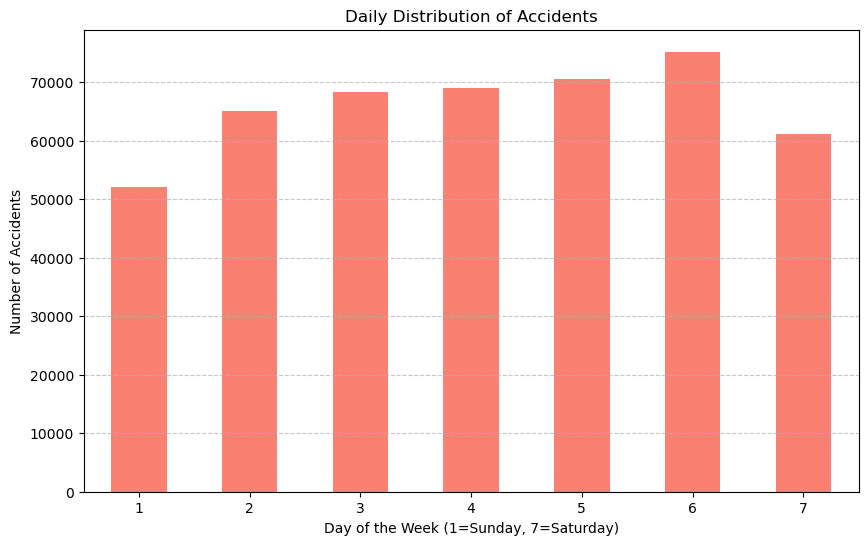

In [77]:
# Group accidents by day of the week
day_of_week_accidents = df_accident.groupby('day_of_week').size()

# Plotting daily accident distribution
plt.figure(figsize=(10, 6))
day_of_week_accidents.plot(kind='bar', color='salmon')
plt.title('Daily Distribution of Accidents')
plt.xlabel('Day of the Week (1=Sunday, 7=Saturday)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Question 2

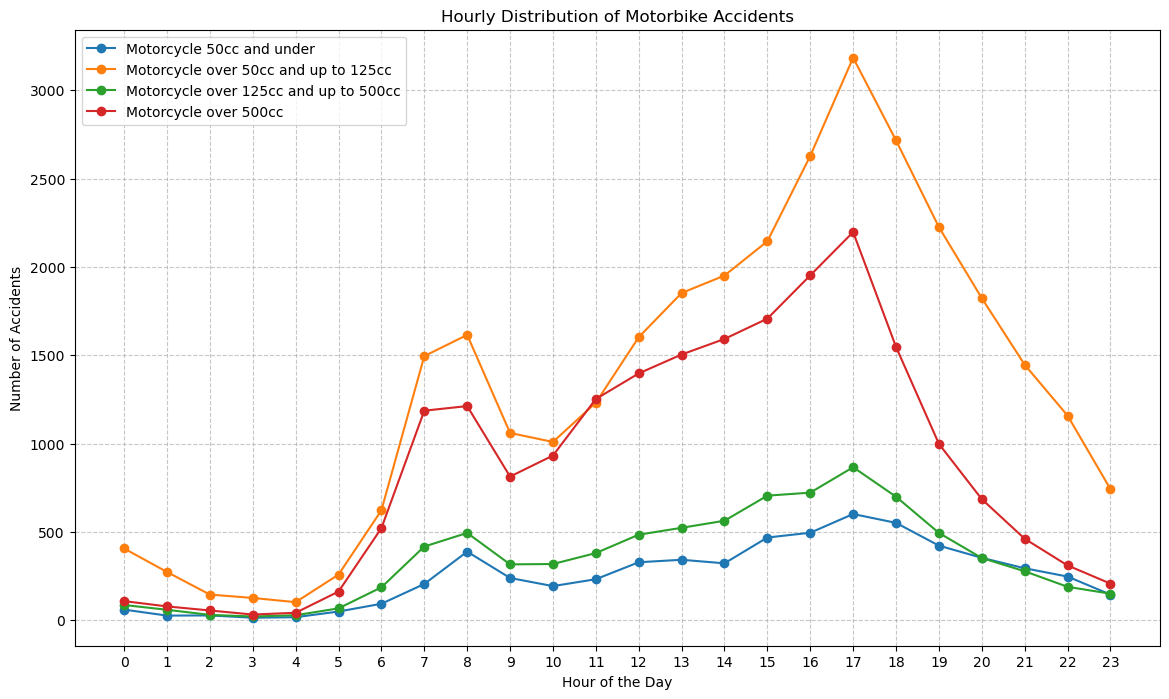

In [78]:
bike_type = {2: "Motorcycle 50cc and under", 3: "Motorcycle over 50cc and up to 125cc", 
             4: "Motorcycle over 125cc and up to 500cc", 5: "Motorcycle over 500cc"}

# Filter the DataFrame to include only motorbike-related accidents
motorbike_df = df_vehicle[df_vehicle['vehicle_type'].isin([2, 3, 4, 5])]

# Merge motorbike_df with df_accident on the accident_index foreign key
merged_df = pd.merge(motorbike_df, df_accident, on='accident_index')

# Extract hour from the time column
merged_df['hour'] = pd.to_datetime(merged_df['time'], format='%H:%M').dt.hour

# Group motorbike accidents by hour of the day
hourly_motorbike_accidents = merged_df.groupby(['vehicle_type', 'hour']).size()

# Plotting hourly distribution of motorbike accidents for each category
plt.figure(figsize=(14, 8))
for vehicle_type, group in hourly_motorbike_accidents.groupby('vehicle_type'):
    plt.plot(group.index.get_level_values('hour'), group.values, label=f'{bike_type[vehicle_type]}', marker='o')
plt.title('Hourly Distribution of Motorbike Accidents')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(24))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

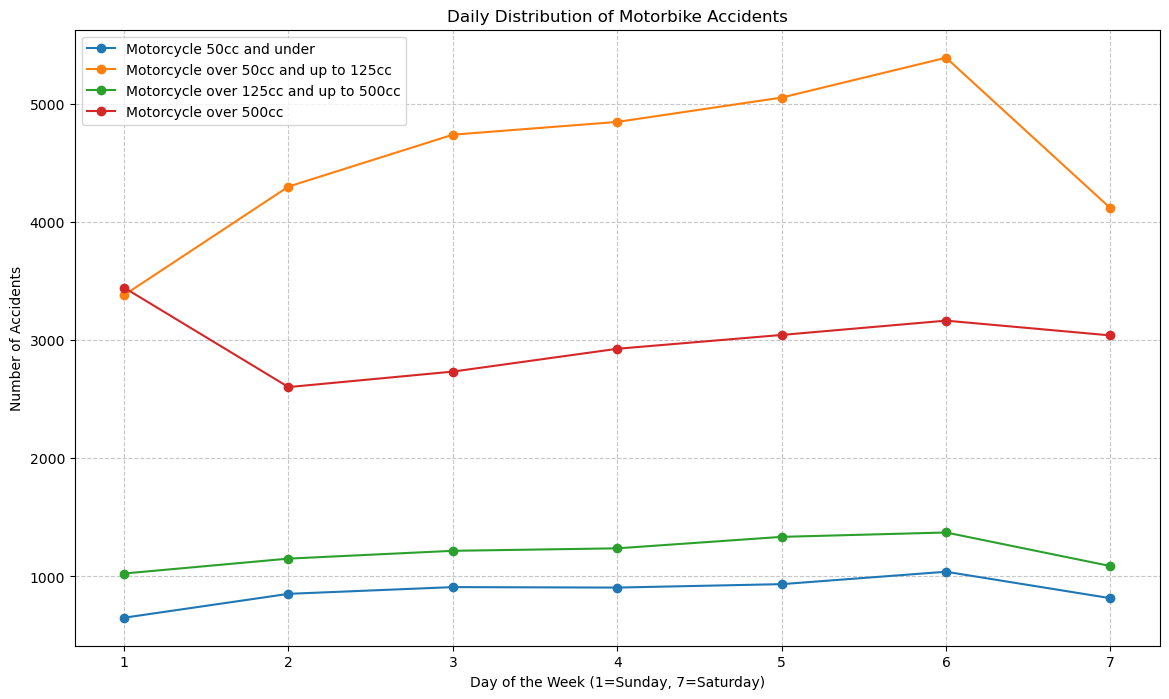

In [79]:
# Group motorbike accidents by day of the week
day_of_week_motorbike_accidents = merged_df.groupby(['vehicle_type', 'day_of_week']).size()

# Plotting daily distribution of motorbike accidents for each category
plt.figure(figsize=(14, 8))
for vehicle_type, group in day_of_week_motorbike_accidents.groupby('vehicle_type'):
    plt.plot(group.index.get_level_values('day_of_week'), group.values, label=f'{bike_type[vehicle_type]}', marker='o')
plt.title('Daily Distribution of Motorbike Accidents')
plt.xlabel('Day of the Week (1=Sunday, 7=Saturday)')
plt.ylabel('Number of Accidents')
plt.xticks(range(1, 8))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Question 3

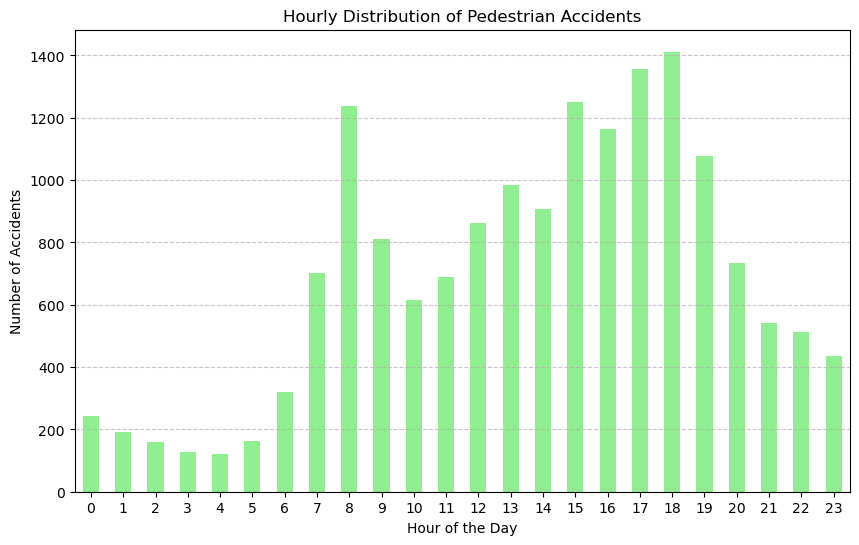

In [96]:
# Filter the DataFrame to include only pedestrian-related accidents
pedestrian_df = df_accident[(df_accident['pedestrian_crossing_human_control'] != 0) & (df_accident['pedestrian_crossing_physical_facilities'] != 0)
                            & (df_accident['pedestrian_crossing_human_control'] != -1) & (df_accident['pedestrian_crossing_physical_facilities'] != -1)]

# Merge pedestrian_df with df_accident on the accident_index foreign key
merged_df = pd.merge(pedestrian_df, df_accident, on='accident_index')

# Extract hour from the time column
merged_df['hour'] = pd.to_datetime(merged_df['time_x'], format='%H:%M').dt.hour

# Group pedestrian accidents by hour of the day
hourly_pedestrian_accidents = merged_df.groupby('hour').size()

# Plotting hourly distribution of pedestrian accidents
plt.figure(figsize=(10, 6))
hourly_pedestrian_accidents.plot(kind='bar', color='lightgreen')
plt.title('Hourly Distribution of Pedestrian Accidents')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

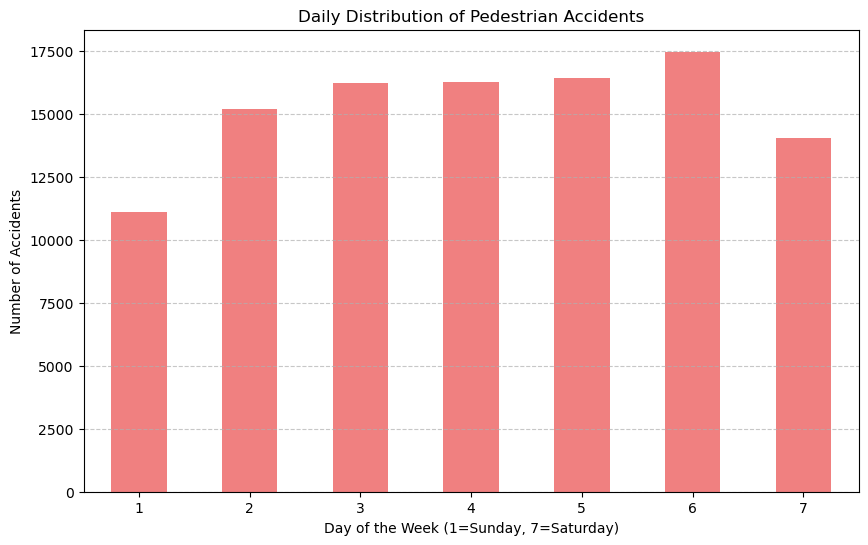

In [81]:
# Group pedestrian accidents by day of the week
day_of_week_pedestrian_accidents = merged_df.groupby('day_of_week_x').size()

# Plotting daily distribution of pedestrian accidents
plt.figure(figsize=(10, 6))
day_of_week_pedestrian_accidents.plot(kind='bar', color='lightcoral')
plt.title('Daily Distribution of Pedestrian Accidents')
plt.xlabel('Day of the Week (1=Sunday, 7=Saturday)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Question 4

In [82]:
# Create a new DataFrame to store encoded categorical variables
df_encoded = df_accident[['speed_limit', 'accident_severity']]

# Convert DataFrame to list of lists for TransactionEncoder
data = df_encoded.values.tolist()

# Initialize TransactionEncoder
te = TransactionEncoder()

# Fit and transform the data to binary format
te_ary = te.fit_transform(data)

# Convert the binary format data to DataFrame
df_encoded_binary = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets using Apriori algorithm with lower support threshold
frequent_itemsets = apriori(df_encoded_binary, min_support=0.2, use_colnames=True)

# Find association rules with lower confidence threshold
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Filter rules related to accident_severity
severity_rules = rules[rules['consequents'].apply(lambda x: 'accident_severity' in str(x))]

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(3),(30),0.798299,0.595235,0.4861,0.608919,1.022989,0.010924,1.034989,0.111412
1,(30),(3),0.595235,0.798299,0.4861,0.816651,1.022989,0.010924,1.100092,0.055518


In [83]:
# Create a new DataFrame to store encoded categorical variables
df_encoded = df_accident[['road_type', 'accident_severity']]

# Convert DataFrame to list of lists for TransactionEncoder
data = df_encoded.values.tolist()

# Initialize TransactionEncoder
te = TransactionEncoder()

# Fit and transform the data to binary format
te_ary = te.fit_transform(data)

# Convert the binary format data to DataFrame
df_encoded_binary = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets using Apriori algorithm with lower support threshold
frequent_itemsets = apriori(df_encoded_binary, min_support=0.2, use_colnames=True)

# Find association rules with lower confidence threshold
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Filter rules related to accident_severity
severity_rules = rules[rules['consequents'].apply(lambda x: 'accident_severity' in str(x))]

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(3),(6),0.827188,0.724789,0.568575,0.687358,0.948356,-0.030963,0.880274,-0.239614
1,(6),(3),0.724789,0.827188,0.568575,0.784469,0.948356,-0.030963,0.801794,-0.165187


In [84]:
# Create a new DataFrame to store encoded categorical variables
df_encoded = df_accident[['weather_conditions', 'accident_severity']]

# Convert DataFrame to list of lists for TransactionEncoder
data = df_encoded.values.tolist()

# Initialize TransactionEncoder
te = TransactionEncoder()

# Fit and transform the data to binary format
te_ary = te.fit_transform(data)

# Convert the binary format data to DataFrame
df_encoded_binary = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets using Apriori algorithm with lower support threshold
frequent_itemsets = apriori(df_encoded_binary, min_support=0.2, use_colnames=True)

# Find association rules with lower confidence threshold
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Filter rules related to accident_severity
severity_rules = rules[rules['consequents'].apply(lambda x: 'accident_severity' in str(x))]

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1),(3),0.797970,0.799117,0.631321,0.791158,0.990041,-0.00635,0.961894,-0.047427
1,(3),(1),0.799117,0.797970,0.631321,0.790023,0.990041,-0.00635,0.962154,-0.047685


In [85]:
# Create a new DataFrame to store encoded categorical variables
df_encoded = df_accident[['junction_detail', 'accident_severity']]

# Convert DataFrame to list of lists for TransactionEncoder
data = df_encoded.values.tolist()

# Initialize TransactionEncoder
te = TransactionEncoder()

# Fit and transform the data to binary format
te_ary = te.fit_transform(data)

# Convert the binary format data to DataFrame
df_encoded_binary = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets using Apriori algorithm with lower support threshold
frequent_itemsets = apriori(df_encoded_binary, min_support=0.2, use_colnames=True)

# Find association rules with lower confidence threshold
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Filter rules related to accident_severity
severity_rules = rules[rules['consequents'].apply(lambda x: 'accident_severity' in str(x))]

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(3),0.41904,0.856199,0.323367,0.771685,0.901292,-0.035415,0.629837,-0.158612


# Question 5

In [14]:
# Kingston upon hull E01012756-E01012918
# East Riding of Yorkshire E01012919-E01013127
kingston_upon_hull = ["E0" + str(i) for i in range(1012756, 1012918 + 1, 1)]
east_riding_of_yorkshire = ["E0" + str(i) for i in range(1012919, 1013127 + 1, 1)]

region_lsoas = kingston_upon_hull + east_riding_of_yorkshire # LSOA codes for the region of interest
accidents_in_region = df_accident[df_accident['lsoa_of_accident_location'].isin(region_lsoas)]

# For example, using K-means clustering based on geographical coordinates (longitude and latitude)
# Select relevant features for clustering (e.g., longitude and latitude)
X = accidents_in_region[['longitude', 'latitude']]

# Define the number of clusters (you may need to experiment with different values)
n_clusters = 5

# Initialize K-means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster labels
accidents_in_region['cluster'] = kmeans.labels_

# Visualize the clusters on a map or analyze the characteristics of each cluster to understand the distribution of accidents in the region
# You can use libraries such as folium or matplotlib for visualization
# Calculate the average latitude and longitude of the accidents in the region
latitude_center = accidents_in_region['latitude'].mean()
longitude_center = accidents_in_region['longitude'].mean()

heat_data = accidents_in_region[['latitude', 'longitude']].values.tolist()
map_region_density = folium.Map(location=[latitude_center, longitude_center], zoom_start=10)
HeatMap(heat_data).add_to(map_region_density)

# Create a map centered around the average latitude and longitude
map_region = folium.Map(location=[latitude_center, longitude_center], zoom_start=10)

# Add markers for each accident, colored by cluster
for index, row in accidents_in_region.iterrows():
    folium.Marker([row['latitude'], row['longitude']], 
                  popup=f"Cluster: {row['cluster']}").add_to(map_region)

# Display the map
map_region.save('accidents_clusters_map.html')
map_region_density.save('accidents_density_map.html')


/home/moneebullah25/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/moneebullah25/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/moneebullah25/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/moneebullah25/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Che

In [7]:
merged_df = pd.merge(df_accident, df_lsoa, left_on='lsoa_of_accident_location', right_on="lsoa01cd")
merged_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,7,03:12,32,E09000010,E09000010,3,105,6,30,0,-1,-1,-1,0,0,4,1,1,0,0,1,1,2,E01001450,1450,E01001450,Enfield 015C,Enfield 015C,3.575795e+05,4460.733335,2d523d4d-befd-47d0-bdde-c7379d543682
1,2017010032253,2017,010032253,532920.0,196290.0,-0.080122,51.649702,1,3,1,1,15/04/2017,7,15:05,32,E09000010,E09000010,3,105,6,30,0,-1,-1,-1,0,0,1,1,1,0,0,1,1,2,E01001450,1450,E01001450,Enfield 015C,Enfield 015C,3.575795e+05,4460.733335,2d523d4d-befd-47d0-bdde-c7379d543682
2,2017010033927,2017,010033927,532940.0,196550.0,-0.079734,51.652034,1,2,1,1,26/04/2017,4,05:00,32,E09000010,E09000010,6,0,2,30,3,2,3,110,0,5,4,1,1,0,0,1,1,2,E01001450,1450,E01001450,Enfield 015C,Enfield 015C,3.575795e+05,4460.733335,2d523d4d-befd-47d0-bdde-c7379d543682
3,2017010045997,2017,010045997,532870.0,196530.0,-0.080753,51.651870,1,2,1,1,30/06/2017,6,13:41,32,E09000010,E09000010,3,105,2,30,6,2,3,110,0,5,1,1,1,0,0,1,1,2,E01001450,1450,E01001450,Enfield 015C,Enfield 015C,3.575795e+05,4460.733335,2d523d4d-befd-47d0-bdde-c7379d543682
4,2017010052115,2017,010052115,532560.0,196560.0,-0.085220,51.652213,1,3,1,1,12/07/2017,4,16:30,32,E09000010,E09000010,3,110,9,30,0,-1,-1,-1,9,9,1,1,9,9,0,1,2,2,E01001450,1450,E01001450,Enfield 015C,Enfield 015C,3.575795e+05,4460.733335,2d523d4d-befd-47d0-bdde-c7379d543682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414786,2020622001037,2020,622001037,318314.0,177560.0,-3.177970,51.491063,62,2,1,1,26/11/2020,5,21:47,-1,W06000015,W06000015,6,0,6,30,0,-1,0,-1,0,0,4,1,1,0,0,1,1,-1,W01001725,34207,W01001725,Cardiff 032D,Caerdydd 032D,1.024445e+05,2500.517731,658fa331-0744-4d7d-a164-17f27df26b03
414787,2020622001051,2020,622001051,260059.0,195490.0,-4.023760,51.640757,62,3,2,1,19/10/2020,2,16:03,-1,W06000011,W06000011,4,4295,6,20,8,4,-1,-1,0,0,1,1,1,0,0,1,1,-1,W01000759,33241,W01000759,Swansea 012A,Abertawe 012A,1.086352e+06,7381.889543,e69c80e0-d9e4-4610-8996-690012f3fe6b
414788,2020622001056,2020,622001056,273696.0,190758.0,-3.825090,51.601461,62,3,1,1,04/11/2020,4,14:42,-1,W06000012,W06000012,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,1,-1,W01000964,33446,W01000964,Neath Port Talbot 016F,Castell-nedd Port Talbot 016F,1.261044e+06,8359.174642,9ed27ad3-207f-47a8-bb49-3026b5996ed1
414789,2020622001091,2020,622001091,317211.0,183386.0,-3.195225,51.543276,62,3,2,1,12/12/2020,7,12:56,-1,W06000015,W06000015,6,0,6,30,3,4,6,0,0,0,1,2,2,0,0,1,1,-1,W01001793,34275,W01001793,Cardiff 002A,Caerdydd 002A,2.455339e+05,3832.484507,f9bf8037-3935-46ef-92a6-90ce1c98369d


In [16]:
# Function to create Folium map with heatmap layer and print severity distribution
def create_heatmap(data, latitude_col, longitude_col, intensity_col, title):
    # Calculate average latitude and longitude
    latitude_center = data[latitude_col].mean()
    longitude_center = data[longitude_col].mean()
    
    # Create Folium map
    heatmap_map = folium.Map(location=[latitude_center, longitude_center], zoom_start=10)
    
    # Convert data to list of [latitude, longitude, weight] for HeatMap
    heat_data = [[row[latitude_col], row[longitude_col], row[intensity_col]] for index, row in data.iterrows()]
    
    # Add heatmap layer to the map
    HeatMap(heat_data).add_to(heatmap_map)
    
    # Add title to the map
    folium.Marker(location=[latitude_center, longitude_center], icon=folium.DivIcon(html=f"<h3>{title}</h3>")).add_to(heatmap_map)
    
    # Print severity distribution
    severity_distribution = data.groupby(intensity_col).size().reset_index(name='count')
    print(f"Severity distribution for {title}:")
    print(severity_distribution)
    
    return heatmap_map

# Group the data by lsoa01nm and count the occurrences
location_counts = merged_df['lsoa01nm'].value_counts()

# Select the top 3 locations
top_locations = location_counts.head(10).index.tolist()

# Filter the data for the top 3 locations
top_location_data = merged_df[merged_df['lsoa01nm'].isin(top_locations)]

# Create the maps for the top 3 locations
severity_map = create_heatmap(top_location_data, 'latitude', 'longitude', 'accident_severity', 'Accident Severity Distribution')
vehicles_map = create_heatmap(top_location_data, 'latitude', 'longitude', 'number_of_vehicles', 'Number of Vehicles Involved')
road_type_map = create_heatmap(top_location_data, 'latitude', 'longitude', 'road_type', 'Road Type vs. Accident Density')

# Display the maps
severity_map.save('severity_map.html')
vehicles_map.save('vehicles_map.html')
road_type_map.save('road_type_map.html')

Severity distribution for Accident Severity Distribution:
   accident_severity  count
0                  1     27
1                  2    383
2                  3   1992
Severity distribution for Number of Vehicles Involved:
   number_of_vehicles  count
0                   1    646
1                   2   1426
2                   3    228
3                   4     70
4                   5     21
5                   6      7
6                   7      4
Severity distribution for Road Type vs. Accident Density:
   road_type  count
0          1    234
1          2    163
2          3   1054
3          6    765
4          7    102
5          9     84


# Question 6

In [29]:
# Merge relevant datasets
merged_df = pd.merge(df_accident, df_lsoa, left_on='lsoa_of_accident_location', right_on="lsoa01cd")
merged_df = pd.merge(merged_df, df_vehicle, on='accident_index')
merged_df = pd.merge(merged_df, df_casualty, on='accident_index')

# Step 2: Feature Selection
# Choose the features or variables that you want to analyze for outliers
selected_features = ["light_conditions", "weather_conditions", "road_type", "speed_limit", "number_of_vehicles", 
                     "junction_detail", "junction_control", "road_surface_conditions", "special_conditions_at_site", 
                     "urban_or_rural_area", "vehicle_type", "towing_and_articulation", "vehicle_manoeuvre",
                     "vehicle_direction_from", "vehicle_direction_to", "vehicle_location_restricted_lane",
                     "junction_location", "skidding_and_overturning", "hit_object_in_carriageway", "vehicle_leaving_carriageway",
                     "hit_object_off_carriageway", "first_point_of_impact", "vehicle_left_hand_drive", "journey_purpose_of_driver",
                     "sex_of_driver", "age_of_driver", "age_band_of_driver", "engine_capacity_cc", "propulsion_code", "age_of_vehicle",
                     "casualty_class", "casualty_reference", "sex_of_casualty", "age_of_casualty",
                     "age_band_of_casualty", "pedestrian_location", "pedestrian_movement",
                     "car_passenger", "bus_or_coach_passenger", "pedestrian_road_maintenance_worker",
                     "casualty_type", "casualty_home_area_type", "casualty_imd_decile"]

# Step 3: Outlier Detection
# Apply Isolation Forest for outlier detection
outlier_detector = IsolationForest(contamination=0.1)  # Adjust contamination parameter as needed
outlier_labels = outlier_detector.fit_predict(merged_df[selected_features])

# Add outlier labels to the merged DataFrame
merged_df['outlier'] = outlier_labels

# Step 4: Decision Making
# Explore and analyze the outliers
outliers = merged_df[merged_df['outlier'] == -1]
dataframe = merged_df[merged_df['outlier'] != -1]

# Print summary of outliers
print("Number of outliers: ", len(outliers), " out of total ", merged_df.shape[0], " rows")
print(outliers.shape)

/home/moneebullah25/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/moneebullah25/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/moneebullah25/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/moneebullah25/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be remo

Number of outliers:  104711  out of total  1047107  rows
(104711, 89)


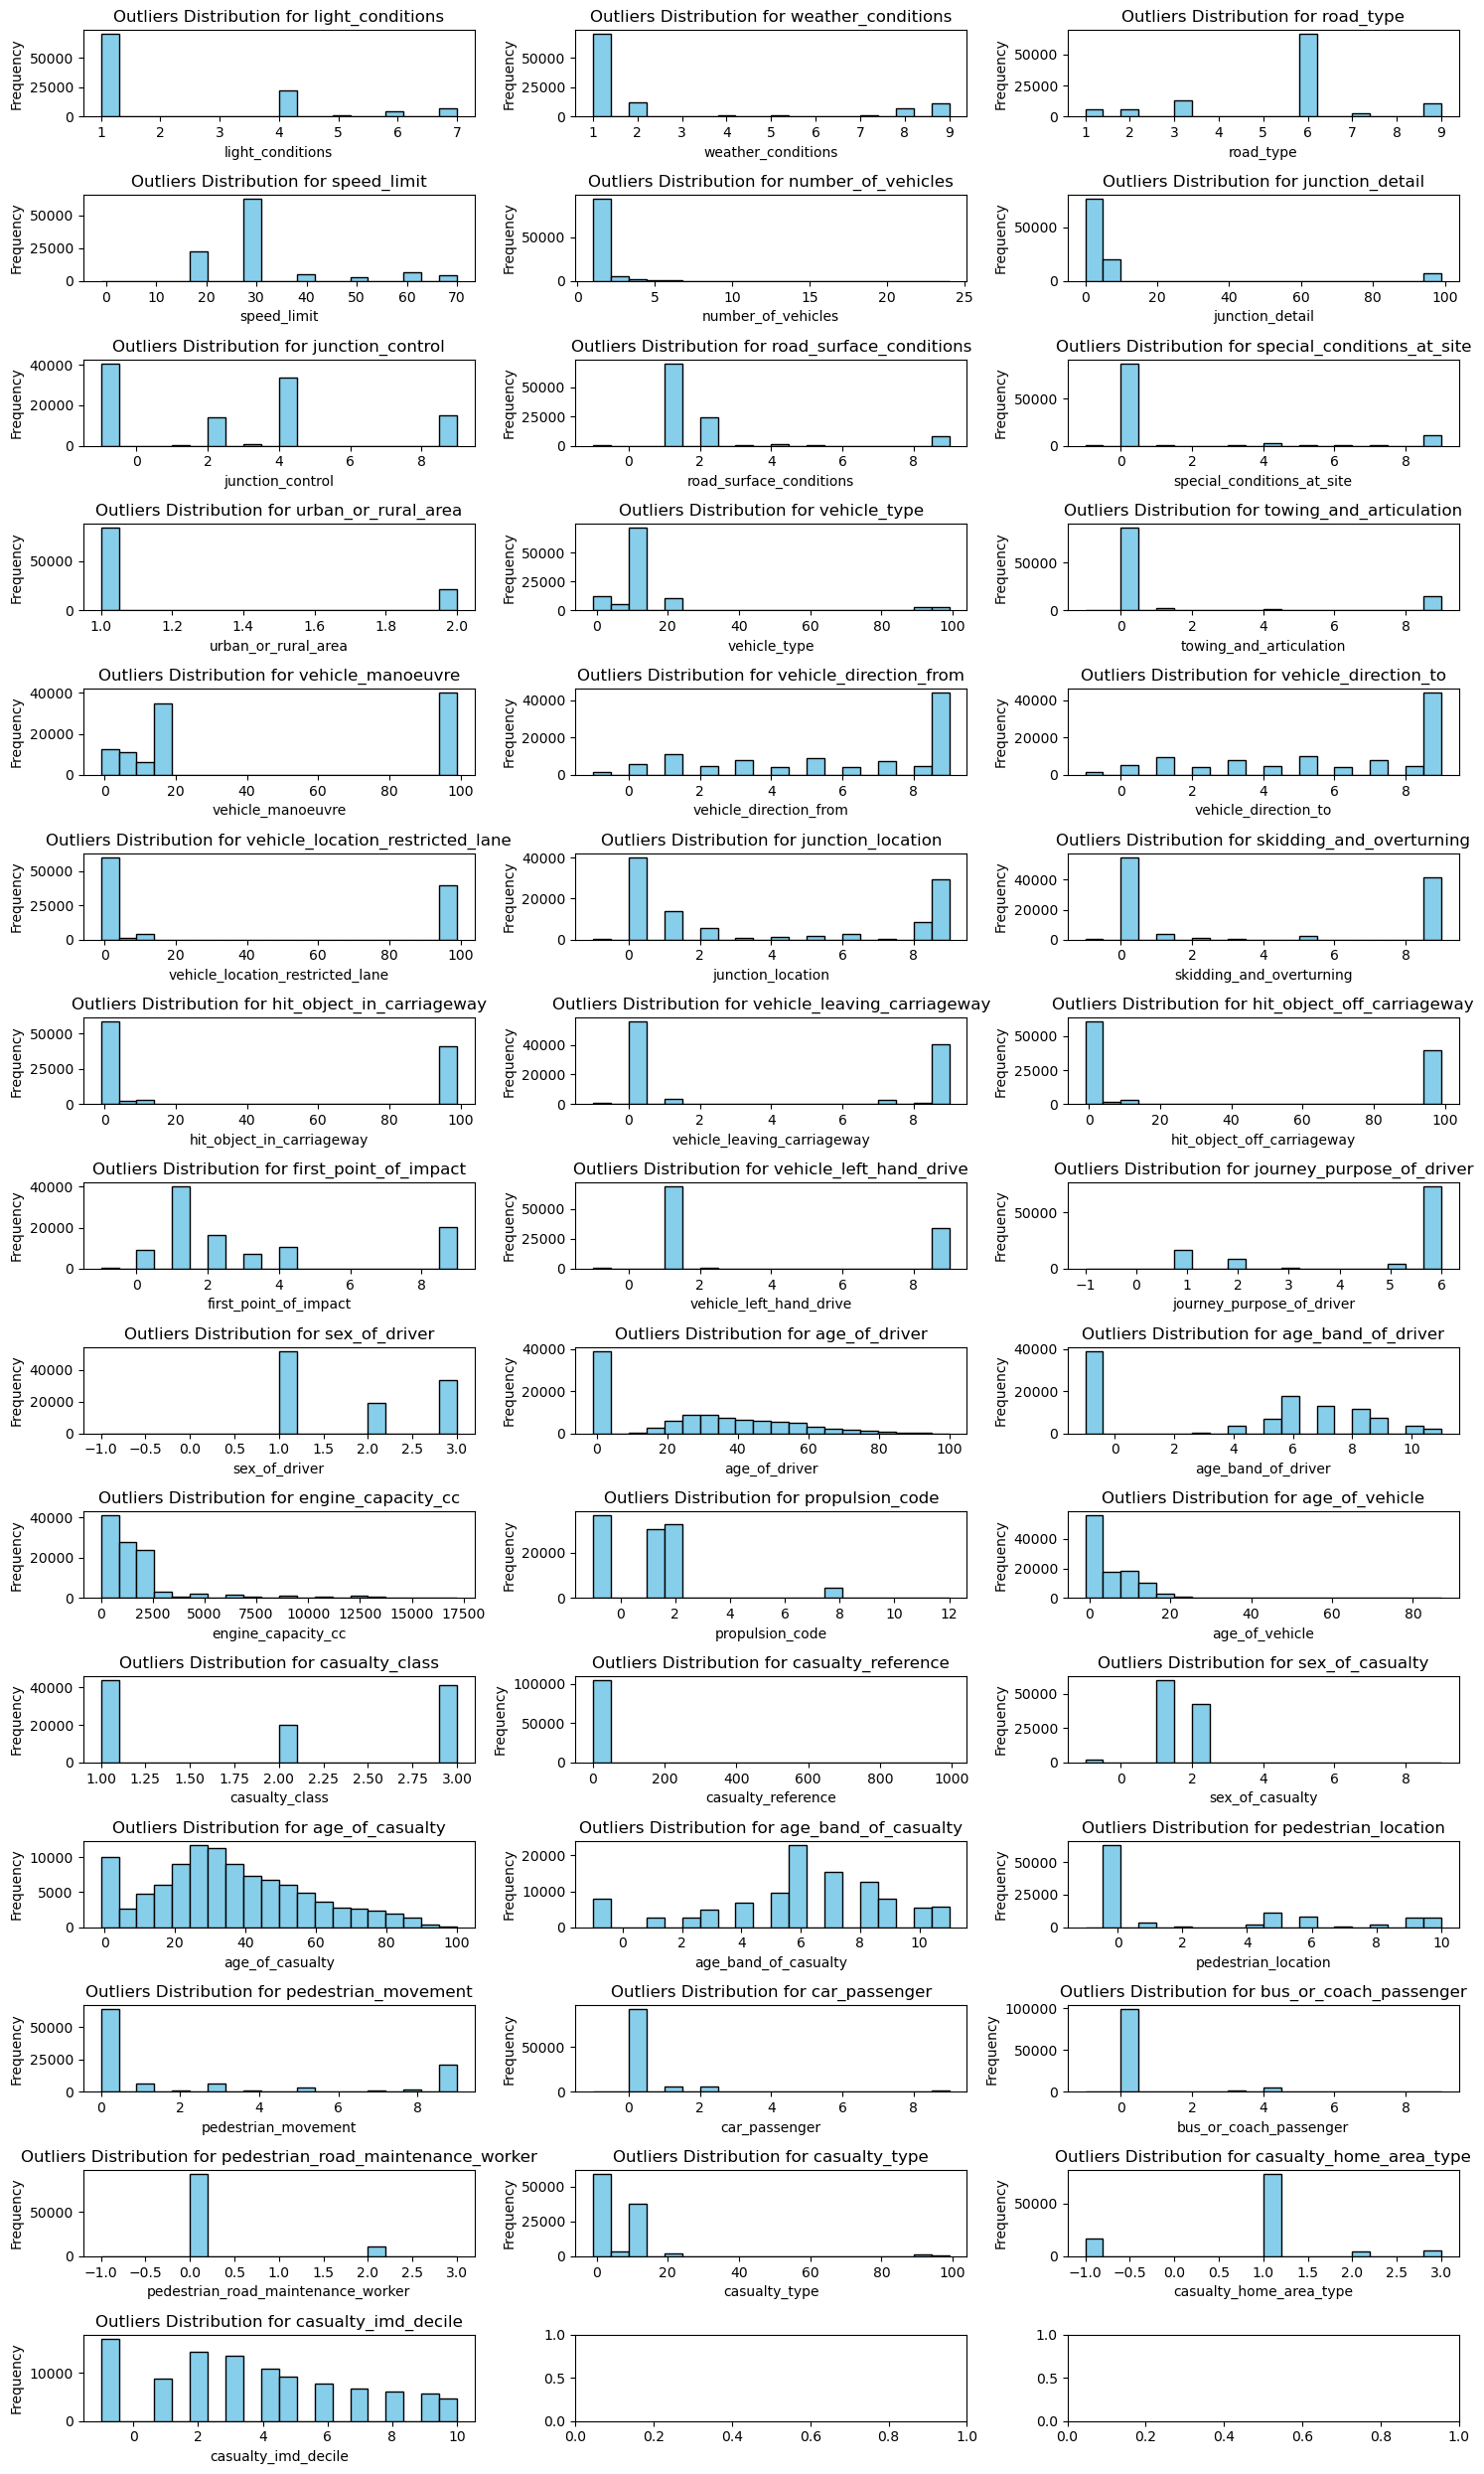

In [41]:
# Plot histograms for each feature to visualize outliers
fig, axes = plt.subplots(nrows=len(selected_features) // 3 + 1, ncols=3, figsize=(15, 25))

for i, feature in enumerate(selected_features):
    ax = axes.flatten()[i]
    ax.hist(outliers[feature], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Outliers Distribution for {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Question 7

In [30]:
dataframe.shape

(942396, 89)

In [31]:
dataframe.columns

Index(['accident_index', 'accident_year_x', 'accident_reference_x',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'objectid', 'lsoa01cd',
       'lsoa01nm', 'lsoa01nmw', 'shape__area', 'shape__length', 'glob

In [32]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942396 entries, 0 to 1047106
Data columns (total 89 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               942396 non-null  object 
 1   accident_year_x                              942396 non-null  int64  
 2   accident_reference_x                         942396 non-null  object 
 3   location_easting_osgr                        942374 non-null  float64
 4   location_northing_osgr                       942374 non-null  float64
 5   longitude                                    942374 non-null  float64
 6   latitude                                     942374 non-null  float64
 7   police_force                                 942396 non-null  int64  
 8   accident_severity                            942396 non-null  int64  
 9   number_of_vehicles                           942396 non-null  i

In [33]:
selected_features = ["light_conditions", "weather_conditions", "road_type", "speed_limit", "number_of_vehicles", 
                     "junction_detail", "junction_control", "road_surface_conditions", "special_conditions_at_site", 
                     "urban_or_rural_area", "vehicle_type", "towing_and_articulation", "vehicle_manoeuvre",
                     "vehicle_direction_from", "vehicle_direction_to", "vehicle_location_restricted_lane",
                     "junction_location", "skidding_and_overturning", "hit_object_in_carriageway", "vehicle_leaving_carriageway",
                     "hit_object_off_carriageway", "first_point_of_impact", "vehicle_left_hand_drive", "journey_purpose_of_driver",
                     "sex_of_driver", "age_of_driver", "age_band_of_driver", "engine_capacity_cc", "propulsion_code", "age_of_vehicle",
                     "casualty_class", "casualty_reference", "sex_of_casualty", "age_of_casualty",
                     "age_band_of_casualty", "pedestrian_location", "pedestrian_movement",
                     "car_passenger", "bus_or_coach_passenger", "pedestrian_road_maintenance_worker",
                     "casualty_type", "casualty_home_area_type", "casualty_imd_decile"]


# Filter out rows with -1 in any selected feature
dataframe = dataframe.loc[~dataframe[selected_features].isin([-1]).any(axis=1)]

# Handle missing values
dataframe.dropna(subset=selected_features + ['accident_severity'], inplace=True)

In [34]:
# Split the dataset into training and testing sets
X = dataframe[selected_features]
y = dataframe['accident_severity']

# Convert feature names to strings
X = X.rename(str,axis="columns")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Model Training
model.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

/home/moneebullah25/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/moneebullah25/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/moneebullah25/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/moneebullah25/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be remo

Accuracy: 0.8308034114527342
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.09      0.17       719
           2       0.70      0.14      0.24     12270
           3       0.84      0.99      0.91     56776

    accuracy                           0.83     69765
   macro avg       0.84      0.41      0.44     69765
weighted avg       0.81      0.83      0.78     69765



/home/moneebullah25/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/moneebullah25/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/moneebullah25/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/moneebullah25/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(d

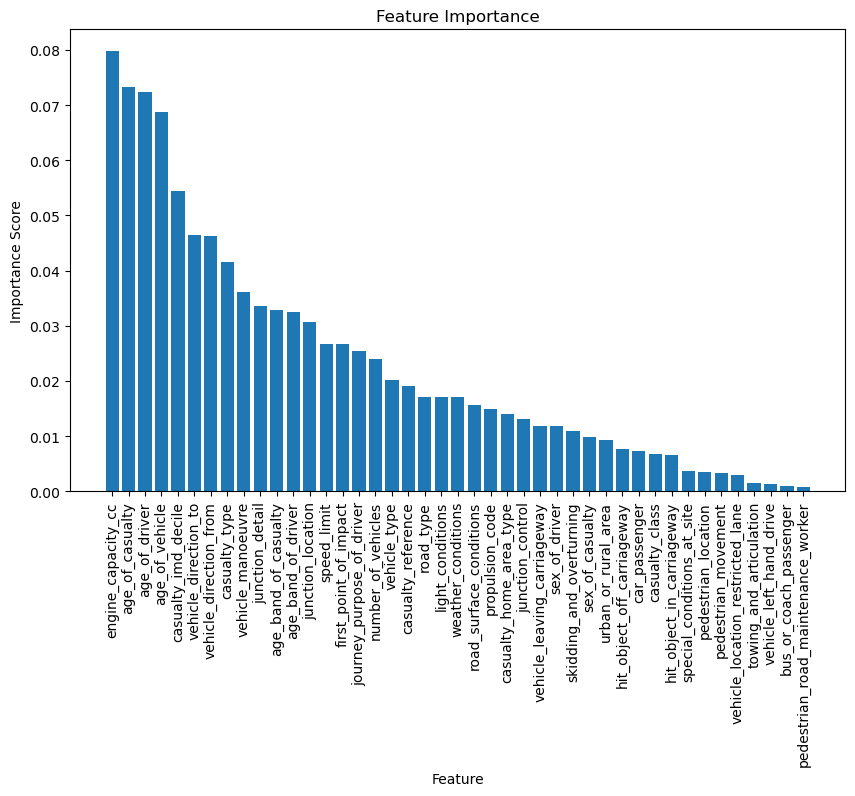

/home/moneebullah25/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/moneebullah25/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/moneebullah25/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/moneebullah25/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(d

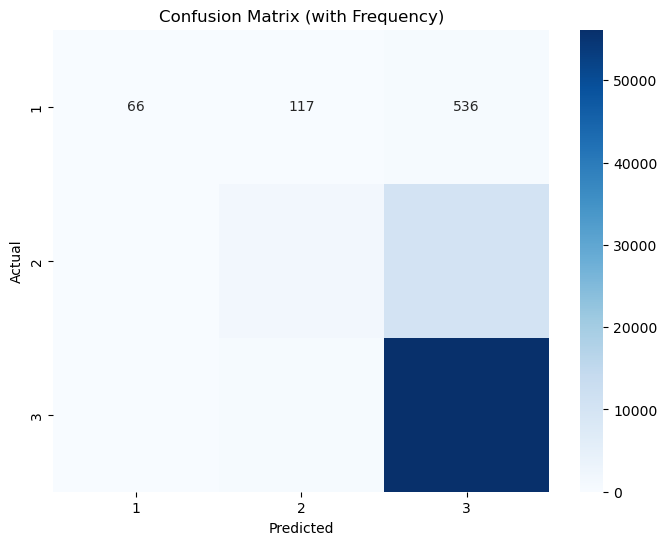

In [40]:
# Plot feature importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importance[sorted_idx], align='center')
plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.show()

# Plot confusion matrix with frequency in each box
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (with Frequency)')
plt.show()

# Question 3 of Presentation

In [6]:
# Define your SQL query
sql_query = '''
SELECT sex_of_driver, sex_of_casualty, speed_limit, age_of_vehicle from casualty 
INNER JOIN accident on casualty.accident_index = accident.accident_index 
INNER JOIN lsoa on accident.lsoa_of_accident_location=lsoa.lsoa01cd
INNER JOIN vehicle on accident.accident_index = vehicle.accident_index
where lsoa.lsoa01nm like "Kingston Upon Hull%";
'''

df_results = pd.read_sql(sql_query, engine)

print(df_results)

      sex_of_driver  sex_of_casualty  speed_limit  age_of_vehicle
0                 1                1           30               9
1                 1                1           30              13
2                 1                2           30              11
3                 3                2           30               6
4                 1                1           30              11
...             ...              ...          ...             ...
6382              1                1           30              -1
6383              1                1           30              -1
6384              1                1           30              -1
6385              1                1           30              -1
6386              3                1           30              -1

[6387 rows x 4 columns]
